# Лабораторная работа 9


![](1.png)
![](2.png)
![](3.png)
![](4.png)

![](5.png)

In [1]:
class Graph:

    def __init__(self, graph):
        self.graph = graph
        self. ROW = len(graph)

    def searching_algo_BFS(self, s, t, parent):

        visited = [False] * (self.ROW)
        queue = []

        queue.append(s)
        visited[s] = True

        while queue:

            u = queue.pop(0)

            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        return True if visited[t] else False

    # Applying fordfulkerson algorithm
    def ford_fulkerson(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0

        while self.searching_algo_BFS(source, sink, parent):

            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            # Adding the path flows
            max_flow += path_flow

            # Updating the residual values of edges
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow

[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
3


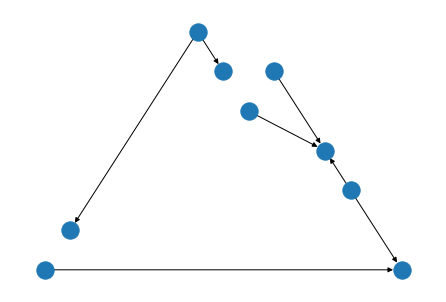

In [4]:
import networkx as nx
graph_2d = [[1,1],[2,1],[2,3],[3,2],[3,4],[4,3],[5,3]]
L = 5
R = 3

G = nx.DiGraph()
def initilize_matrix(graph,l,r):
    N = l+r+2
    matrix = list()
    [matrix.append([0]*N) for i in range(N)]
    matrix[0][1:l+1] = [1]*l
    for i in range(r):
        matrix[l+i][-1]=1
    for v in graph:
        matrix[v[0]][l+v[1]]=1
    
    print(matrix)
    return matrix
import numpy as np
matrix = initilize_matrix(graph_2d,L,R)
g = Graph(matrix)
print(np.array(g.ford_fulkerson(0,L+R+1)))
